# HSE 2024: Mathematical Methods for Data Analysis

## Homework 2

# Attention!

* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

If the task asks for an explanation of something, it means that a written answer is required, which is part of the task and is assessed

We only accept ipynb notebooks. If you use Google Colab, you need to download the notebook before submitting your homework

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we will use a dataset of tracks from the streaming service Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Target variable**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [26]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns

In [27]:
data.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [28]:
data.nunique()

artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

## Linear Regression

#### 0. [0.25 points] Code the categorical features. Explain the method you have chosen.

In [29]:
# after reading the description and looking at data these features appear to be categorial
categorial_features = [
    "explicit",
    "key",
    "mode",
    "time_signature",
    "track_genre"
]
# these features are also categorical, but they have too many unique values, we could fix this by using word embeddings or other NLP methods
# however this is not the goal of this task
nlp_features = ["artists", "album_name", "track_name"]

# there are numerical features
numerical_features = [
    "popularity",
    "duration_ms",
    "danceability",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]

#### 1. [0.25 points] Split the data into train and test with a ratio of 80:20 and random_state=42.

In [30]:
X, y = data.drop(['energy'], axis=1), data['energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(91200, 22800)

#### 2. [0.75 points] Train models on train, excluding categorical features, using the StatsModels library and apply it to test; use $RMSE$ and $R^2$ as quality metrics. Try also applying linear regression implementations from sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$

Don't forget to scale your data using StandardScaler before training your models!

In [31]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

In [32]:
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

model_sm = sm.OLS(y_train, X_train_sm).fit()

y_pred_sm = model_sm.predict(X_test_sm)

rmse_sm = np.sqrt(mean_squared_error(y_test, y_pred_sm))
r2_sm = r2_score(y_test, y_pred_sm)

print("StatsModels OLS RMSE:", rmse_sm)
print("StatsModels OLS R²:", r2_sm)

StatsModels OLS RMSE: 0.12185169282189574
StatsModels OLS R²: 0.7640826589205965


In [33]:
linear_model = LinearRegression()

linear_model.fit(X_train_scaled, y_train)

y_pred = linear_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear RMSE:", rmse)
print("Linear R²:", r2)

Linear RMSE: 0.12185169282189576
Linear R²: 0.7640826589205963


In [34]:
ridge_model = Ridge(alpha=0.03)

ridge_model.fit(X_train_scaled, y_train)

y_pred = ridge_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Ridge RMSE:", rmse)
print("Ridge R²:", r2)

Ridge RMSE: 0.12185169384565525
Ridge R²: 0.7640826549563902


In [35]:
lasso_model = Lasso(alpha=0.05)

lasso_model.fit(X_train_scaled, y_train)

y_pred = lasso_model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Lasso RMSE:", rmse)
print("Lasso R²:", r2)

Lasso RMSE: 0.14798373613042762
Lasso R²: 0.6520436982694833


#### 3. [0.25 points] Repeat the steps from the previous point, adding categorical features. Comment on the changes in the quality metrics values

In [36]:
# numerical features
scaler = StandardScaler()
X_train_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_numerical = scaler.transform(X_test[numerical_features])

# caterorial features
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
X_train_categorial = encoder.fit_transform(X_train[categorial_features]).toarray()
X_test_categorial = encoder.transform(X_test[categorial_features]).toarray()

X_train_num_cat = np.concatenate([X_train_numerical, X_train_categorial], axis=1)
X_test_num_cat = np.concatenate([X_test_numerical, X_test_categorial], axis=1)

y_train = pd.DataFrame(y_train).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)

In [37]:
X_train_sm = sm.add_constant(pd.DataFrame(X_train_num_cat).reset_index(drop=True))
X_test_sm = sm.add_constant(pd.DataFrame(X_test_num_cat).reset_index(drop=True))

model_sm = sm.OLS(y_train, X_train_sm).fit()

y_pred_sm = model_sm.predict(X_test_sm)

rmse_sm = np.sqrt(mean_squared_error(y_test, y_pred_sm))
r2_sm = r2_score(y_test, y_pred_sm)

print("StatsModels OLS RMSE:", rmse_sm)
print("StatsModels OLS R²:", r2_sm)

StatsModels OLS RMSE: 0.11220622836690176
StatsModels OLS R²: 0.7999536370568916


In [38]:
linear_model = LinearRegression()

linear_model.fit(X_train_num_cat, y_train)

y_pred = linear_model.predict(X_test_num_cat)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear RMSE:", rmse)
print("Linear R²:", r2)

Linear RMSE: 0.11220622836690186
Linear R²: 0.7999536370568914


In [39]:
ridge_model = Ridge(alpha=0.03)

ridge_model.fit(X_train_num_cat, y_train)

y_pred = ridge_model.predict(X_test_num_cat)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Ridge RMSE:", rmse)
print("Ridge R²:", r2)

Ridge RMSE: 0.11220611751017649
Ridge R²: 0.7999540323375114


In [40]:
lasso_model = Lasso(alpha=0.05)

lasso_model.fit(X_train_num_cat, y_train)

y_pred = lasso_model.predict(X_test_num_cat)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Lasso RMSE:", rmse)
print("Lasso R²:", r2)

Lasso RMSE: 0.14798373613042762
Lasso R²: 0.6520436982694833


#### 4. [1 point] Examine the parameter values ​​of the models obtained from StatsModels and check which weights and in which models turned out to be zero. Comment on the significance of the coefficients, the overall significance of the models and other factors from the resulting tables

In [41]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 energy   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     2664.
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:35:04   Log-Likelihood:                 70658.
No. Observations:               91200   AIC:                        -1.410e+05
Df Residuals:                   91059   BIC:                        -1.397e+05
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2416      0.011     21.055      0.000       0.219       0.264
0             -0.0033      0.000     -7.714      0.000      -0.004      -0.002
1              0.0011      0.000      2.657      0.008       0.000       0.002
2             -0.0218      0.001    -39.325      0.000      -0.023      -0.021
3              0.1357      0.001    230.204      0.000       0.135       0.137
4              0.0230      0.001     44.744      0.000       0.022       0.024
5             -0.0822      0.001   -140.880      0.000      -0.083      -0.081
6              0.0243      0.001     45.646      0.000       0.023       0.025
7              0.0206      0.000     50.378      0.000       0.020       0.021
8              0.0404      0.001     80.674      0.000       0.039       0.041
9              0.0061      0.000     15.117      0.000       0.005       0.007
10            -0.0097      0.001     -6.596      0.000      -0.013      -0.007
11             0.0111      0.002      6.740      0.000       0.008       0.014
12             0.0028      0.002      1.775      0.076      -0.000       0.006
13            -0.0028      0.002     -1.176      0.240      -0.007       0.002
14             0.0039      0.002      2.256      0.024       0.001       0.007
15            -0.0019      0.002     -1.110      0.267      -0.005       0.001
16             0.0049      0.002      2.701      0.007       0.001       0.008
17             0.0035      0.002      2.243      0.025       0.000       0.006
18             0.0052      0.002      2.815      0.005       0.002       0.009
19             0.0044      0.002      2.709      0.007       0.001       0.008
20             0.0102      0.002      5.590      0.000       0.007       0.014
21             0.0079      0.002      4.563      0.000       0.004       0.011
22            -0.0056      0.001     -6.838      0.000      -0.007      -0.004
23             0.3046      0.011     26.940      0.000       0.282       0.327
24             0.2914      0.011     27.184      0.000       0.270       0.312
25             0.3258      0.011     30.493      0.000       0.305       0.347
26             0.2972      0.011     27.047      0.000       0.276       0.319
27             0.0839      0.006     14.758      0.000       0.073       0.095
28             0.0883      0.006     15.554      0.000       0.077       0.099
29             0.0616      0.006     10.937      0.000       0.051       0.073
30             0.0785      0.006     13.675      0.000       0.067       0.090
31             0.0844      0.006     14.971      0.000       0.073       0.095
32             0.1709      0.006     29.388      0.000       0.159       0.182
33             0.0511      0.006      9.050      0.000       0.040       0.062
34             0.0448      0.006      7.926      0.000       0.034       0.056
35

It doesn't zero out any parameters, however it's not surprising because it isn't using regularization.

In [42]:
lasso_model.coef_

array([-0.        ,  0.        , -0.        ,  0.09558628,  0.        ,
       -0.07828713,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.  

However, if we now look at lasso model, here it zeroed out every single weight except two.

In [43]:
ridge_model.coef_

array([[-0.00331484,  0.00108738, -0.02175282,  0.13565726,  0.02297808,
        -0.08215616,  0.02431216,  0.020624  ,  0.0404424 ,  0.00606037,
        -0.00973059,  0.01107892,  0.00283289, -0.00277682,  0.00391098,
        -0.00189005,  0.00485391,  0.00346283,  0.0051597 ,  0.00437175,
         0.0102324 ,  0.0078721 , -0.00563272,  0.30422021,  0.29110713,
         0.32549687,  0.29688151,  0.08356111,  0.08799837,  0.06123254,
         0.07818433,  0.08406089,  0.17052406,  0.05074075,  0.04443394,
         0.04291396,  0.14194216,  0.04330844,  0.02312568,  0.10707253,
         0.00147943, -0.0014946 ,  0.0690761 ,  0.09235011,  0.13837182,
         0.0218029 ,  0.03612693,  0.03567114,  0.20348552,  0.11148549,
         0.1378512 ,  0.1046516 ,  0.02579008,  0.11900132,  0.0589406 ,
         0.08573355,  0.08621796,  0.04556559,  0.08080069,  0.05515466,
         0.0596831 ,  0.13350283,  0.07435159,  0.01434103,  0.07948159,
         0.06552226,  0.01994004,  0.10017219,  0.1

And ridge doesn't zero out any weights, which is also not surprising because of the way L2 regularization works.

#### 5. [1 point] Implement one of the feature selection algorithms (Elimination by P-value, Forward elimination, Backward elimination), draw conclusions.

In [44]:
significance_level = 0.05

# P-value elimination
while True:
    model_sm = sm.OLS(y_train, X_train_sm).fit()  
    max_p_value = model_sm.pvalues.max()
    
    if max_p_value > significance_level:
        excluded_feature = model_sm.pvalues.idxmax()
        print(f"Removing feature {excluded_feature} with p-value {max_p_value}")
        

        X_train_sm = X_train_sm.drop(columns=[excluded_feature]).reset_index(drop=True)
        X_test_sm = X_test_sm.drop(columns=[excluded_feature]).reset_index(drop=True)
    else:
        break

preds = model_sm.predict(X_test_sm)


rmse_sm = np.sqrt(mean_squared_error(y_test, preds))
r2_sm = r2_score(y_test, preds)

print("StatsModels OLS RMSE:", rmse_sm)
print("StatsModels OLS R²:", r2_sm)

Removing feature 41 with p-value 0.8374620143895892
Removing feature 78 with p-value 0.6910735190457282
Removing feature 40 with p-value 0.5075308805016102
Removing feature 15 with p-value 0.26425945619253505
Removing feature 13 with p-value 0.3809424380380759
Removing feature 124 with p-value 0.0698305027257394
StatsModels OLS RMSE: 0.11221312709937135
StatsModels OLS R²: 0.7999290375531993


As we can see elemination by p-value didn't effect model quality.

#### 6. [1 point] Find the best (RMSE) $\alpha$ for Lasso regression using 4-fold cross-validation. You should choose a value from the logarithmic range $[10^{-4}, 10^{3}]$.

In [45]:
alpha_values = np.logspace(-4, 3, 20)

model_lasso = Lasso()

param_grid = {"alpha": alpha_values}

grid_search = GridSearchCV(model_lasso, param_grid, cv=4, scoring="neg_root_mean_squared_error")

grid_search.fit(X_train_num_cat, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value: {best_alpha}")


best_rmse = np.sqrt(-grid_search.best_score_)
print(f"Best RMSE: {best_rmse}")
best_r2 = r2_score(y_test, grid_search.predict(X_test_num_cat))
print(f"Best R²: {best_r2}")


lasso_best = Lasso(alpha=best_alpha)
lasso_best.fit(X_train_scaled, y_train)


y_pred = lasso_best.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {test_rmse}")
test_r2 = r2_score(y_test, y_pred)
print(f"Test R²: {test_r2}")

Best alpha value: 0.0001
Best RMSE: 0.33621615124823123
Best R²: 0.796103513769233
Test RMSE: 0.12185403186872831
Test R²: 0.7640736015658242


## Gradient Descent

#### 7. [3.5 points] Implement Ridge regression for MSE loss trained using gradient descent.

All computations must be vectorized, and Python loops can only be used for gradient descent iterations. The stopping criteria must be (simultaneously):

* checking the absolute norm of the difference in weights on two adjacent iterations (e.g., less than some small number of the order of $10^{-6}$, specified by the `tolerance` parameter);

* reaching the maximum number of iterations (e.g., 10000, specified by the `max_iter` parameter).

You need to do:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is an estimate of the gradient over a set of objects chosen at random.

* Moment of method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k})}{\sqrt{G_{k+1} + \epsilon}}.
$$

To verify that the optimization process is actually running, we will use the `loss_history` class attribute. After calling the fit method, it should contain the loss function values ​​for all iterations starting from the first (up to the first step along the antigradient).

You need to initialize the weights with a random vector from a normal distribution. Below is a template that should contain code implementing all the model variants.

In [46]:
from sklearn.base import BaseEstimator


class LinReg(BaseEstimator):
    def __init__(
        self,
        delta=0.001,
        gd_type="Momentum",
        tolerance=1e-4,
        max_iter=1000,
        w0=None,
        eta=1e-2,
        alpha=1e-3,
        epsilon=1e-8,
        reg_cf=1e-4,
    ):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        reg_cf: float
            regularization coefficient
        epsilon: float
            numerical stability
        """

        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.w = None
        self.alpha = alpha
        self.eta = eta
        self.epsilon = epsilon
        self.reg_cf = reg_cf
        self.loss_history = None

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []

        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = self.w0 if self.w0 is not None else np.random.randn(X.shape[1])

        self.momentum = np.zeros(X.shape[1])

        self.g = np.zeros(X.shape[1])

        for i in range(self.max_iter):
            self.loss_history.append(self.calc_loss(X, y))

            if self.gd_type == "GradientDescent":
                update = self.calc_gradient(X, y)
            elif self.gd_type == "StochasticDescent":
                indices = np.random.choice(
                    X.shape[0], int(X.shape[0] * self.delta), replace=False
                )
                update = self.calc_gradient(X[indices], y[indices])
            elif self.gd_type == "Momentum":
                dw = self.calc_gradient(X, y)
                self.momentum = self.alpha * self.momentum + self.eta * dw
                update = self.momentum
            elif self.gd_type == "Adagrad":
                dw = self.calc_gradient(X, y)
                self.g += dw**2
                update = dw / np.sqrt(self.g + self.epsilon)
            else:
                raise ValueError(
                    "Invalid gradient descent type: {self.gd_type}"
                )

            self.w -= self.eta * update

            if np.linalg.norm(self.eta * update) < self.tolerance:
                break

        return self

    def predict(self, X):
        if self.w is None:
            raise Exception("Not trained yet")

        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.w

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        return (2 * X.T @ (X @ self.w - y) / X.shape[0]) + (
            2 * self.reg_cf * self.w
        )

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        return np.mean((X @ self.w - y) ** 2)

#### 8. [1 point] Train and validate "manual" models on the same data, compare the quality with models from Sklearn and StatsModels. Investigate the influence of the `max_iter` and `alpha` parameters on the optimization process. Does it meet your expectations?

In [47]:
def test_model(model, X_train, y_train, X_test, y_test):
    if not isinstance(y_train, np.ndarray):
        y_train = np.array(y_train)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Results for {model.gd_type} model:")
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test RMSE: {test_rmse}")
    test_r2 = r2_score(y_test, y_pred)
    print(f"Test R²: {test_r2}")
    print("----------\n")

gd_model = LinReg(gd_type='GradientDescent', eta=1e-1)
sgd_model = LinReg(gd_type='StochasticDescent', eta=1e-1)
momentum_model = LinReg(gd_type='Momentum', eta=1e-1, alpha=1e-2)
adagrad_model = LinReg(gd_type='Adagrad', eta=1)

# here I'm using only numerical features because it's allowed and trains faster
# so I'm going to be comparing the results to the results of models with only numerical features
X, y = data.drop(['energy'], axis=1), data['energy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

for model in [gd_model, sgd_model, momentum_model, adagrad_model]:
    test_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

Results for GradientDescent model:
Test RMSE: 0.12184948867521328
Test R²: 0.7640911937502666
----------

Results for StochasticDescent model:
Test RMSE: 0.12296208238081502
Test R²: 0.7597634128049362
----------

Results for Momentum model:
Test RMSE: 0.12210076012902739
Test R²: 0.763117233688045
----------

Results for Adagrad model:
Test RMSE: 0.12185250235107205
Test R²: 0.7640795242476054
----------



Models achieve same results as models from StatsModels and sklearn.

#### 9. [1 point] Plot graphs of the loss function values ​​as a function of the iteration number for all models (full gradient descent, stochastic gc, Momentum, and Adagrad). Draw conclusions about the convergence rate of various modifications of gradient descent.

Don't forget about what a *nice* graph should look like!

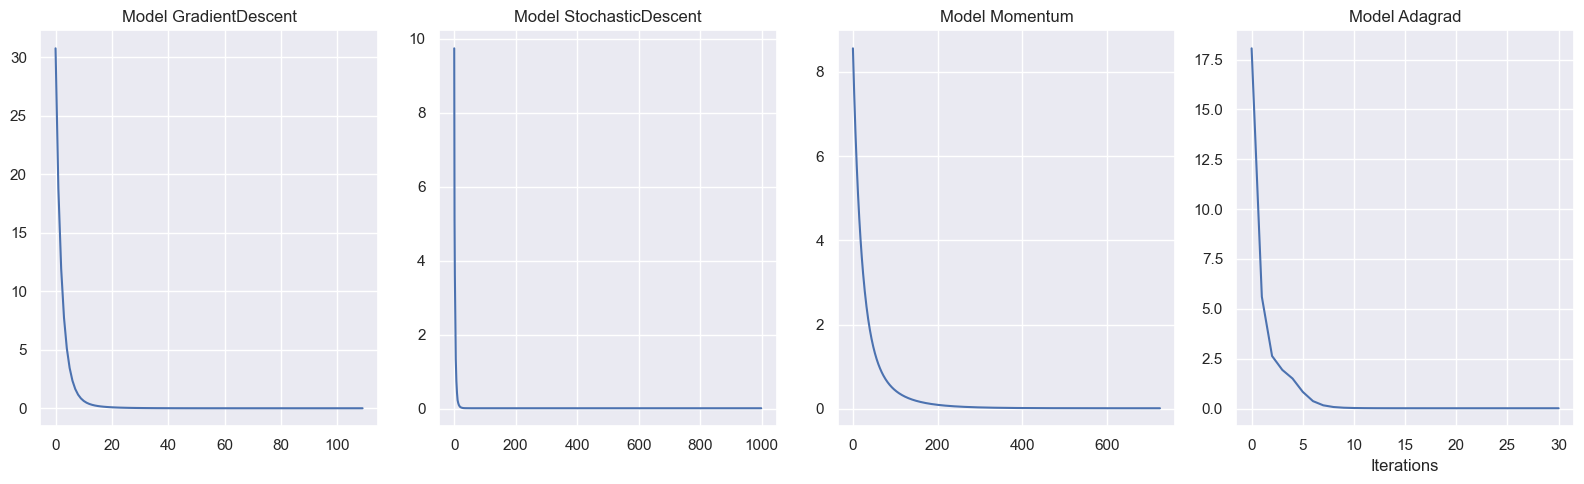

In [48]:
plt.figure(figsize=(16, 5))

for i, model in enumerate([gd_model, sgd_model, momentum_model, adagrad_model]):
    plt.subplot(1, 4, i + 1)
    plt.plot(np.arange(0, len(model.loss_history)), model.loss_history)
    plt.title(f"Model {model.gd_type}")

plt.xlabel("Iterations")
plt.tight_layout()
plt.show()

Adagram converges first, then batch gradient descent, then we have momentum and stochastic doesn't stop early (does all 1000 iterations).

However, I find this assignment very weird, because each step of SGD is much smaller in terms of FLOPS and samples.
Obviously momentum with batch gradient descent achieved worse results then batch gradient descent without momentum, because 
the point of momentum is to make gradient  descent on mini-batches (SGD, Adam) more stable.